<img style="float: left; margin: 30px 15px 15px 15px;" src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg" width="400" height="600" /> 
    
    
## Backtesting
    
### Portafolios de Inversión

    Mtro. Sean Nicolás González Vázquez

---

### 1.- Introducción
    
<img src="https://static.seekingalpha.com/uploads/2017/5/12/681960-1494615735398704.png" style="float: right; margin-left: 20px;" width="500"/>
    
+ El **backtesting** es el proceso de **simular una estrategia de inversión con el objetivo de evaluar su viabilidad al analizar su comportamiento histórico** utilizando datos pasados. Este método permite medir cómo se hubiera comportado un portafolio si se hubiera implementado en el pasado.


+ El backtesting permite **evaluar el potencial de una estrategia** al analizar su capacidad para generar rendimientos consistentes y mantener **métricas de desempeño** robustas. Además, es una herramienta clave para **seleccionar estrategias de inversión** y detectar posibles debilidades antes de implementarlas en tiempo real.  


+ **Hipótesis del mercado eficiente:** El backtesting asume que los precios reflejan toda la información disponible, pero también que es posible encontrar ineficiencias en los precios que puedan ser explotadas (es posible generar *Alpha*).


+ **Overfitting:** Es el **riesgo de sobre-ajustar la estrategia demasiado bien a los datos históricos**, en portafolios, esta directamente relacionada con el **look-ahead bias**. El overfitting causa que los resultados sean muy buenos en backtesting, pero muy malos en la implementación real.


#### Conceptos clave en un Backtesting

<img src="https://assets-global.website-files.com/5fba23eb8789c3c7fcfb5f31/615b914ea1e51ed044882902_Strategy%20Backtesting%20Performance%20Metrics.jpg" style="float: left; margin-left: 20px;" width="350"/>


**Horizonte de inversión:** El período sobre el cual se realiza el backtesting.  
    
    
**Capital Inicial:** El monto asignado para iniciar la inversión.
  
  
**Costos transaccionales:** Costo por la compra/venta de activos, comisión del broker, IVA, ISR, etc. Estos deben incluirse para hacer el backtesting más realista.  
  


**Benchmark:** Al realizar el backtesting para una estrategia de inversión, siempre es recomendable además de comparar contra otras estrategias, competir contra una estrategia de inversión pasiva, es decir, estar invertido en el *benchmark*.    
  
  

**Métricas de Desempeño:** Para medir el desempeño de una estrategia en backtesting, es recomendable comparar utilizando métricas de desempeño como el rendimiento anual promedio, el rendimiento efectivo, la volatilidad, el upside y downside risk. Existen otras métricas *(que veremos la siguiente clase)* que nos pueden ayudar, como el Ratio de Sortino, la Beta, el Ratio de Treynor, el VaR, entre otras. 



#### Pasos para realizar un Backtesting 
    
    
**1.- Definir los Activos del Portafolio**

    Especificar los activos que serán parte del portafolio.  
    
    Descargar los datos históricos (precios de cierre ajustado) de los activos.  
    
    
    
**2.- Selección de Estrategias y Optimización de Ponderaciones** 
    
    Describir claramente la estrategia de inversión (Activa o Pasiva) y el algoritmo de Asset Allocation 
    que se utilizará.

    Con los datos históricos obtenidos, calcular las ponderaciones eficientes para las estrategias que 
    se desean simular.
    
**3.- Simular el comportamiento del Portafolio**

    Implementar la estrategia definida en el paso anterior con los datos históricos.  
    
    Realizar operaciones de compra y venta según las reglas predefinidas.  
    
    Incorporar Costos Transaccionales.  
    
    Incluir comisiones, impuestos, spreads de compra/venta, impacto del Tipo de Cambio para simular
    con precisión el desempeño de la o las estrategias.

**4.- Métricas de Desempeño**
    
    Evaluar el desempeño del portafolio usando distintas métricas.

**5.- Toma de Decisiones Financieras**

    Analizar los resultados del backtesting.   
    
    Concluir acerca del desempeño de las estrategias, ¿En que aspectos destaca cada una de ellas? ¿Qué factores hay que considerar?
    
    Seleccionar la estrategia de inversión que mejor se adecúe a nuestros objetivos y características.  
    
    
**6.- Re-Optimización de Ponderaciones del Portafolios**

    Con la estrategia de Asset Allocation seleccionada, se re-optimizan los pesos para la implementación
    del portafolio.

> **Esta breve introducción nos brinda una visión general sobre cómo implementar un backtesting, destacando su valor como una herramienta financiera para evaluar y seleccionar estrategias de asignación de activos. ¡Es momento de ponerla en práctica!**

--- 

###  2.- **Backtesting Implementation**

    

Como mencionamos anteriormente, el objetivo del backtesting es simular el desempeño de un portafolio de inversión. Aunque el proceso es sencillo en su lógica, es crucial comprender sus detalles, así como sus ventajas y desventajas.

En este caso, supondremos que deseamos elegir entre dos estrategias, **Máximo Ratio de Sharpe** o **Mínima Varianza**, para aplicarlas a un portafolio que crearemos.

Comencemos descargando los datos de nuestro portafolio, compuesto por **Apple**, **Berkshire Hathaway**, **Nike** y **Eli Lilly & Co**. Los datos abarcarán el período desde el `01/01/2020` hasta `hoy`.


In [64]:
# Importacion de Librerías
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [65]:
# Descarga de Datos
tickers=['AAPL', 'BRK-B', 'NKE', 'LLY']
prices=yf.download(tickers, start='2020-01-01', end= '2025-06-20')['Close']

[*********************100%***********************]  4 of 4 completed


In [66]:
# Obtengamos rendimientos diarios
rets_assets = prices.pct_change().dropna()

    Ahora hay que obtener los pesos eficientes, tanto en mínima varianza como en máximo Sharpe.

In [67]:
# Definir estrategias, para posteriormente optimizar pesos

# Función para optimizar Min Var
def opt_min_var(rets):
    
    cov=rets.cov()
    n_assets = len(rets.columns)
    
    var = lambda w: w.T @ cov @ w
    
    w0=np.ones(n_assets)/n_assets
    
    bounds=[(0, 1)]*n_assets
    
    constraint=lambda w: sum(w)-1
    
    result=minimize(fun=var, x0=w0, bounds=bounds, constraints={'fun': constraint, 'type': 'eq'}, tol=1e-16)
    
    return result.x
    

In [68]:
w_min_var = opt_min_var(rets_assets)    

dict_min_var = dict(zip(rets_assets.columns, w_min_var))
dict_min_var

{'AAPL': 0.045397632041406316,
 'BRK-B': 0.6986884414136542,
 'LLY': 0.19223561179766102,
 'NKE': 0.06367831474727852}

In [69]:
# Función para optimizar Sharpe
def opt_max_sharpe(rets, rf):
    
    E=rets.mean()
    cov=rets.cov()
    n_assets = len(rets.columns)
    
    rs = lambda w: -((w.T @ E - rf/252) / np.sqrt(w.T @ cov @ w))
    
    w0=np.ones(n_assets)/n_assets
    
    bounds=[(0, 1)]*n_assets
    
    constraint=lambda w: sum(w)-1
    
    result=minimize(fun=rs, x0=w0, bounds=bounds, constraints={'fun': constraint, 'type': 'eq'}, tol=1e-16)
    
    return result.x

In [70]:
# Obtener ponderaciones en las estrategias que queremos evaluar 
w_max_sharpe = opt_max_sharpe(rets_assets, rf=0.045)
dict_max_sharpe = dict(zip(rets_assets.columns, w_max_sharpe))
dict_max_sharpe

{'AAPL': 0.1814716008764298,
 'BRK-B': 0.11842888443584554,
 'LLY': 0.7000995146877247,
 'NKE': 0.0}

Con los pesos obtenidos para el portafolio eficiente, simularemos su evolución asumiendo un capital inicial de **USD $1,000,000**. Nuestro objetivo es calcular cómo habría crecido ese millón de dólares desde la fecha inicial hasta la fecha final, basándonos en los rendimientos históricos del portafolio.

Para ello, es necesario calcular el valor del portafolio en cada momento, siguiendo la lógica descrita a continuación.

El valor del portafolio en el primer día será simplemente el capital inicial:

$$V_{port, 0} = Cap_{inicial}$$

En el segundo día:

$$V_{port, 1} = V_{port, 0} \times (1 + r_{port, 1})$$

Para el tercer día:

$$V_{port, 2} = V_{port, 1} \times (1 + r_{port, 2}) = V_{port, 0} \times (1 + r_{port, 1}) \times (1 + r_{port, 2})$$

Y para el cuarto día:

$$V_{port, 3} = V_{port, 2} \times (1 + r_{port, 3}) = V_{port, 0} \times (1 + r_{port, 1}) \times (1 + r_{port, 2}) \times (1 + r_{port, 3})$$

De este modo, podemos generalizar que el valor del portafolio en el día $n$ es el capital inicial multiplicado por el producto de los rendimientos diarios acumulados:

$$V_{port,n} = Cap_{inicial} \times \prod_{i=1}^{n} (1 + r_{port,i})$$

Recuerda que el rendimiento diario del portafolio se calcula como la suma ponderada de los rendimientos individuales de cada activo $j$, de acuerdo con sus respectivos pesos en el portafolio:

$$r_{port} = \sum_{j=1}^{n} w_j r_j$$

    Ahora implementaremos este proceso paso a paso y graficaremos la evolución de las dos estrategias. 
    No olvides que siempre es útil comparar el desempeño del portafolio contra un benchmark.


In [71]:
# Establecer capital inicial 
C_i = 1000000
C_i

1000000

In [72]:
# Obtener evolucion del portafolio para cada estrategia
# Estrategia 1.- Min Var
evol_minvar = (rets_assets * w_min_var).sum(axis=1)+1
evol_minvar[0] = C_i  # Se mete el capital inicial en el primer día

evol_minvar= evol_minvar.cumprod()
evol_minvar.head()

C:\Users\ppmel\AppData\Local\Temp\ipykernel_20072\2194490930.py:4: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  evol_minvar[0] = C_i  # Se mete el capital inicial en el primer día


Date
2020-01-03    1.000000e+06
2020-01-06    1.003523e+06
2020-01-07    1.000336e+06
2020-01-08    1.002881e+06
2020-01-09    1.015238e+06
dtype: float64

In [73]:
# Estrategia 2.- Max Sharpe
evol_maxsharpe = (rets_assets * w_max_sharpe).sum(axis=1)+1
evol_maxsharpe[0] = C_i  # Se mete el capital inicial en el primer día
evol_maxsharpe= evol_maxsharpe.cumprod()
evol_maxsharpe.head()

C:\Users\ppmel\AppData\Local\Temp\ipykernel_20072\2498611054.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  evol_maxsharpe[0] = C_i  # Se mete el capital inicial en el primer día


Date
2020-01-03    1.000000e+06
2020-01-06    1.004473e+06
2020-01-07    1.004385e+06
2020-01-08    1.013721e+06
2020-01-09    1.030772e+06
dtype: float64

In [74]:
# Estrategia 3.- Pasiva

benchmark = yf.download('^GSPC', start ='2020-01-01', end='2025-06-20', progress=False)['Close']

benchmark_rets = benchmark.pct_change().dropna()+1
benchmark_rets.iloc[0] = C_i  # Se mete el capital inicial en el primer día
benchmark_rets = benchmark_rets.cumprod()
benchmark_rets.head()



Ticker,^GSPC
Date,
2020-01-03,1.000000e+06
2020-01-06,1.003533e+06
2020-01-07,1.000720e+06
2020-01-08,1.005626e+06
2020-01-09,1.012319e+06


In [75]:
evolution_all = pd.DataFrame(index=benchmark_rets.index)
evolution_all['Min Var'] = evol_minvar.values
evolution_all['Max Sharpe'] = evol_maxsharpe.values
evolution_all['Pasiva'] = benchmark_rets.values
evolution_all.head()

,Min Var,Max Sharpe,Pasiva
Date,,,
2020-01-03,1.000000e+06,1.000000e+06,1.000000e+06
2020-01-06,1.003523e+06,1.004473e+06,1.003533e+06
2020-01-07,1.000336e+06,1.004385e+06,1.000720e+06
2020-01-08,1.002881e+06,1.013721e+06,1.005626e+06
2020-01-09,1.015238e+06,1.030772e+06,1.012319e+06


Text(0, 0.5, 'Valor del Portafolio')

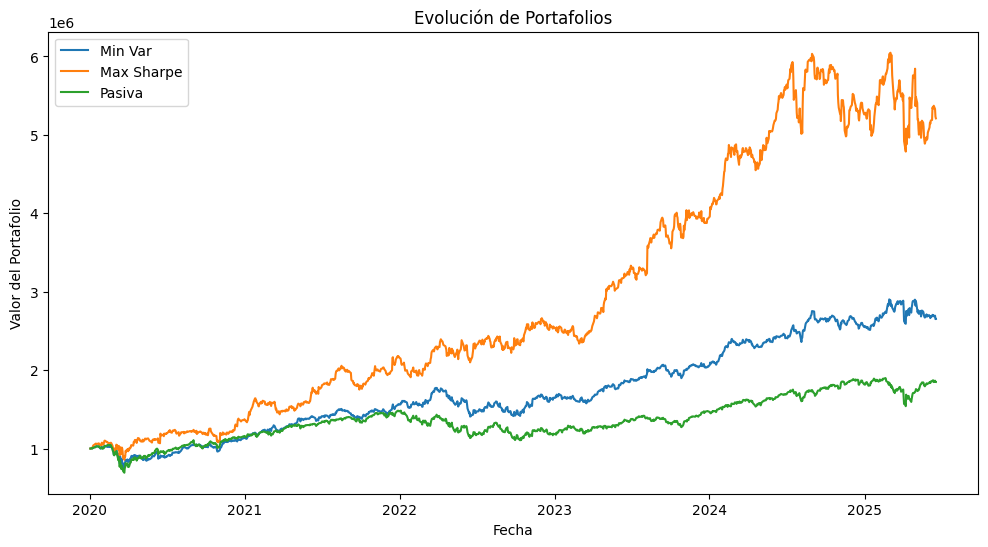

In [76]:
# Graficar la evolucion para ambos portafolios


plt.figure(figsize=(12, 6))
plt.plot(evolution_all, label=evolution_all.columns)
plt.legend()
plt.title('Evolución de Portafolios')
plt.xlabel('Fecha')
plt.ylabel('Valor del Portafolio')



Excelente, pero ¿qué información nos aporta realmente la gráfica? Aunque visualmente puede resultar atractiva, su única función es mostrar cuál estrategia terminó con el mayor rendimiento a lo largo del período. Sin embargo, no nos responde preguntas clave como: ¿Cuál estrategia tuvo mayor volatilidad? ¿Cuál ofreció una mejor relación entre rendimiento y riesgo? ¿Cuál presentó un menor downside risk?

Para responder a estas interrogantes, contamos con **métricas de desempeño**, que ofrecen una evaluación más completa del comportamiento promedio de las estrategias simuladas. Algunas de las métricas que hemos analizado hasta ahora incluyen:

- **Rendimiento esperado**
- **Rendimiento efectivo**
- **Volatilidad**
- **Ratio de Sharpe**
- **Upside Risk**
- **Downside Risk**
- **Ratio Omega**

Existen muchas más métricas, y cada administrador de portafolios tiene sus preferidas, dependiendo de los objetivos y perfiles de inversión de sus clientes. 


    Ahora, calcularemos estas métricas y las presentaremos en un dataframe para facilitar su visualización.


In [77]:
# Metricas de Desempeño

# Rendimientos diarios de los portafolios
evolution_rets = evolution_all.pct_change().dropna()

# Métricas de Desempeño
metricas = pd.DataFrame(index=evolution_rets.columns)
evolution_esperado =  evolution_rets.mean() * 252  # Anualizado
metricas['Rendimiento Esperado Anual %'] = evolution_esperado*100
metricas['Rendimiento Efectivo %'] = (evolution_all.iloc[-1] / C_i- 1)*100
metricas['Volatilidad Anual %'] = evolution_rets.std() * np.sqrt(252)*100  # Anualizado
metricas['Ratio Sharpe'] = (metricas['Rendimiento Esperado Anual %'] - 0.045) / metricas['Volatilidad Anual %']
metricas['Upside Risk %'] = (evolution_rets[evolution_rets > 0].fillna(0)).std() * np.sqrt(252)*100  # Anualizado
metricas['Downside Risk %'] = (evolution_rets[evolution_rets < 0].fillna(0)).std() * np.sqrt(252)*100  # Anualizado
metricas['Omega'] =  metricas['Upside Risk %'] / metricas['Downside Risk %']


metricas.T

,Min Var,Max Sharpe,Pasiva
Rendimiento Esperado Anual %,20.047287,34.052535,13.655729
Rendimiento Efectivo %,165.237186,421.101184,84.888633
Volatilidad Anual %,20.551192,27.306985,21.677569
Ratio Sharpe,0.973291,1.245379,0.627872
Upside Risk %,13.087633,18.769622,13.285289
Downside Risk %,12.544132,15.053036,13.899017
Omega,1.043327,1.246899,0.955844


In [78]:
evolution_rets = evolution_rets.std() * np.sqrt(252)  # Anualizado*

Excelente. Ahora, analicen las métricas de desempeño y seleccionen la mejor estrategia de Asset Allocation basándose en el comportamiento histórico de este conjunto de activos financieros.


Aunque en este caso la selección de la estrategia parece evidente, es posible que las conclusiones obtenidas sean incorrectas. Les invito a investigar el concepto de look-ahead bias y discutir por qué el enfoque utilizado anteriormente es inadecuado para llevar a cabo el backtesting de un portafolio de inversión.

---

### 3.- Static Backtesting Implementation



Como habrás notado, en la sección anterior realizamos el *backtesting* utilizando la misma información que empleamos para optimizar las ponderaciones del portafolio. Esto significa que conocíamos de antemano lo que sucedería con nuestros activos, algo que en la realidad no es posible.

> **Imagina que hoy quieres realizar un *backtesting* para seleccionar una estrategia de inversión. ¿Con qué información optimizarías los pesos de tu portafolio?**

Dado que no disponemos de datos sobre el comportamiento futuro de los activos, debemos basarnos en información pasada, es decir, en lo que ya ha ocurrido. Cuando utilizamos los mismos datos del *backtesting* para optimizar el portafolio, estamos, en esencia, asumiendo que conocemos el futuro. Este es el motivo por el cual muchos gestores que emplean esta metodología obtienen métricas de rendimiento excesivamente optimistas, pero al implementar la estrategia en el mundo real, los resultados difieren significativamente debido al **`look-ahead bias`**.

> **Look-ahead bias:** Sesgo que ocurre cuando, al realizar un análisis o simulación, se utilizan datos futuros que no habrían estado disponibles en el momento de la toma de decisiones.

Para evitar este sesgo en el *backtesting*, se utiliza una ventana de información pasada para optimizar el portafolio. Por ejemplo, si queremos realizar un *backtesting* para el período 2021-2024, deberíamos optimizar con datos de un período anterior, como 2019-2021. Si queremos realizar un *backtesting* de dos años, utilizamos los dos años previos para la optimización, y así sucesivamente. Se recomienda que el período de datos utilizado para la optimización coincida con el horizonte temporal del *backtesting*.


    Ahora, implementemos el backtesting de forma correcta para el mismo portafolio presentado anteriormente, 
    separando entre datos de optimización y datos de backtest.



#### **Paso 1. Descarga de Precios**

In [79]:
# Descarguemos precios

# Descarga de Datos
# Precios de optimizacion

tickers=['AAPL', 'BRK-B', 'NKE', 'LLY']
prices_opt=yf.download(tickers, start='2021-06-20', end= '2023-06-20')['Close']
rets_opt = prices_opt.pct_change().dropna()

# Precios de Backtesting
prices_bt = yf.download(tickers, start='2023-06-20', end='2025-06-20')['Close']
rets_bt = prices_bt.pct_change().dropna()

[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed


In [80]:
# Obtengamos rendimientos diarios

w_minvar = opt_min_var(rets_opt)
w_max_sharpe = opt_max_sharpe(rets_opt, rf=0.045)


#### **Paso 2. Selección de las estrategias de AA y obtención de las ponderaciones para la simulación**

In [81]:
# Obtener ponderaciones en las estrategias que queremos evaluar por ejemplo: Radio de Sharpe y min var


#### **Paso 3. Backtesting de Estrategias**

#### **Paso 4. Métricas de Desempeño**

In [ ]:
# Rendimientos de los portafolios



# Métricas de Desempeño

# Rendimientos diarios de los portafolios
evolution_rets = evolution_all.pct_change().dropna()

# Métricas de Desempeño
metricas = pd.DataFrame(index=evolution_rets.columns)
evolution_esperado =  evolution_rets.mean() * 252  # Anualizado
metricas['Rendimiento Esperado Anual %'] = evolution_esperado*100
metricas['Rendimiento Efectivo %'] = (evolution_all.iloc[-1] / C_i- 1)*100
metricas['Volatilidad Anual %'] = evolution_rets.std() * np.sqrt(252)*100  # Anualizado
metricas['Ratio Sharpe'] = (metricas['Rendimiento Esperado Anual %'] - 0.045) / metricas['Volatilidad Anual %']
metricas['Upside Risk %'] = (evolution_rets[evolution_rets > 0].fillna(0)).std() * np.sqrt(252)*100  # Anualizado
metricas['Downside Risk %'] = (evolution_rets[evolution_rets < 0].fillna(0)).std() * np.sqrt(252)*100  # Anualizado
metricas['Omega'] =  metricas['Upside Risk %'] / metricas['Downside Risk %']


metricas.T




""
Rendimiento Esperado Anual %
Rendimiento Efectivo %
Volatilidad Anual %
Ratio Sharpe
Upside Risk %
Downside Risk %
Omega


#### **Paso 5. Toma de Decisiones Financieras**

Al observar el desempeño de tu portafolio con la inversión simulada en 2020, esta sería la evolución *real* del portafolio. A diferencia del *backtesting* previo, en esta ocasión utilizamos únicamente datos anteriores a la simulación para la optimización, de la misma manera que lo haría un gestor en ese momento.

+ ¿Qué estrategia elegirías ahora?
+ ¿Por qué?

Con base en las conclusiones obtenidas en la sección anterior, responde:

+ ¿Ha cambiado algo?
+ ¿Qué habría ocurrido si hubieras invertido siguiendo la lógica del *backtesting* con **look-ahead bias**?
+ ¿Cuál de las dos metodologías te parece más adecuada?


####  Paso 6. Re-Optimización de Ponderaciones del Portafolios

Con la estrategia de **Asset Allocation** seleccionada, procede a re-optimizar las ponderaciones para determinar los pesos en los que distribuirías tu inversión al **implementar** la estrategia en la práctica.

In [94]:
# Obtener ponderaciones para implementación del portafolio (inversión)
re_opt = pd.DataFrame(index=  rets_assets.columns)
re_opt['w'] = opt_min_var(rets_bt)
re_opt['Cash'] = re_opt['w'] * C_i
re_opt['No. Acciones'] = np.floor(re_opt['Cash'] / prices_bt.iloc[-1])
re_opt

,w,Cash,No. Acciones
Ticker,,,
AAPL,0.084994,84994.180894,432.0
BRK-B,0.744319,744318.508530,1534.0
LLY,0.099471,99470.801472,126.0
NKE,0.071217,71216.509104,1196.0


---

### 4.- Consideraciones
    

> El **backtesting** es una herramienta útil para la **selección y evaluación de estrategias de inversión**, basada en el comportamiento histórico de los activos que componen un portafolio. 

> El backtesting es una **herramienta de simulación histórica, no de predicción.**

> Las **métricas de desempeño proporcionan una visión** detallada sobre el **desempeño esperado de una estrategia** en un portafolio específico, considerando las características y sinergias de los activos que lo componen.

> Además de las métricas de desempeño, **es importante considerar las características propias de un inversionista** para seleccionar una estrategia.

> **El backtesting no es infalible**. **En casos de eventos extraordinarios** o cambios estructurales, como un "*black swan*", el desempeño de los activos, y por ende del portafolio, **puede verse significativamente alterado**, alejandose de su comportamiento histórico.

> A pesar de estas limitaciones, el backtesting nos permite analizar cómo hubiera evolucionado un portafolio en el pasado bajo una estrategia determinada, revelando aspectos que, sin este análisis, podrían pasar desapercibidos.

> Es importante considerar el **look-ahead bias** a la hora de realizar la simulación de un portafolio, en caso contrario, tendremos un muy buen desempeño en backtesting y mal desempeño al implementar el portafolio. Este fenómeno se denomina **over-fitting**.